In [1]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

data = pd.read_csv('crash_ready_for_dummies.csv')

In [2]:
data.head()

,Crash Date/Time,ACRS Report Type,Injury Severity,Speed Limit,Vehicle Year,Latitude,Longitude,Vehicles in Crashes Last Hour,Crash Year,Crash Quarter,Crash Month,Crash DayOfWeek,Crash Hour,Crash Time,Is Holiday,Is Peak Hour,Is Weekend,Distance,Total Vehicles,Distance_Bin,Injury_Target
0,2015-01-01 00:30:00,Property Damage Crash,NO APPARENT INJURY,35,2008,39.022001,-77.102673,0,2015,1,1,3,0,00:30,1,0,0,14.88,2,10-14 miles,0
1,2015-01-01 00:30:00,Property Damage Crash,NO APPARENT INJURY,35,1993,39.022001,-77.102673,1,2015,1,1,3,0,00:30,1,0,0,14.88,2,10-14 miles,0
2,2015-01-01 01:10:00,Property Damage Crash,NO APPARENT INJURY,40,2007,39.196610,-77.265547,2,2015,1,1,3,1,01:10,1,0,0,1.64,2,0-4 miles,0
3,2015-01-01 01:10:00,Property Damage Crash,NO APPARENT INJURY,40,2010,39.196610,-77.265547,3,2015,1,1,3,1,01:10,1,0,0,1.64,2,0-4 miles,0
4,2015-01-01 01:14:00,Injury Crash,SUSPECTED MINOR INJURY,40,2002,39.096217,-77.109803,4,2015,1,1,3,1,01:14,1,0,0,10.48,2,10-14 miles,2


In [3]:
data1 = data.drop(columns=['ACRS Report Type', 'Vehicles in Crashes Last Hour', 'Crash Time',
                   'Injury Severity','Distance_Bin'])

In [4]:
data.drop(columns=['ACRS Report Type', 'Vehicles in Crashes Last Hour', 'Crash Time',
                   'Injury Severity', 'Latitude', 'Longitude', 'Distance_Bin'], inplace=True)

In [5]:
data.head()

,Crash Date/Time,Speed Limit,Vehicle Year,Crash Year,Crash Quarter,Crash Month,Crash DayOfWeek,Crash Hour,Is Holiday,Is Peak Hour,Is Weekend,Distance,Total Vehicles,Injury_Target
0,2015-01-01 00:30:00,35,2008,2015,1,1,3,0,1,0,0,14.88,2,0
1,2015-01-01 00:30:00,35,1993,2015,1,1,3,0,1,0,0,14.88,2,0
2,2015-01-01 01:10:00,40,2007,2015,1,1,3,1,1,0,0,1.64,2,0
3,2015-01-01 01:10:00,40,2010,2015,1,1,3,1,1,0,0,1.64,2,0
4,2015-01-01 01:14:00,40,2002,2015,1,1,3,1,1,0,0,10.48,2,2


In [6]:
data['Vehicle Age'] = data['Crash Year'] - data['Vehicle Year']

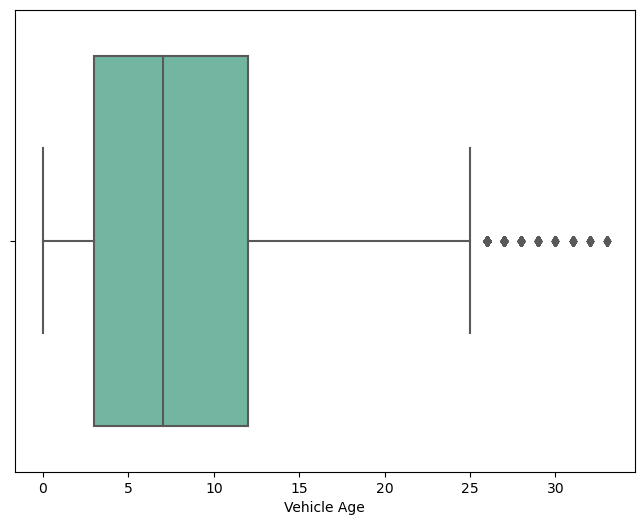

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Vehicle Age'], palette='Set2')
plt.show()

In [8]:
data.head()

,Crash Date/Time,Speed Limit,Vehicle Year,Crash Year,Crash Quarter,Crash Month,Crash DayOfWeek,Crash Hour,Is Holiday,Is Peak Hour,Is Weekend,Distance,Total Vehicles,Injury_Target,Vehicle Age
0,2015-01-01 00:30:00,35,2008,2015,1,1,3,0,1,0,0,14.88,2,0,7
1,2015-01-01 00:30:00,35,1993,2015,1,1,3,0,1,0,0,14.88,2,0,22
2,2015-01-01 01:10:00,40,2007,2015,1,1,3,1,1,0,0,1.64,2,0,8
3,2015-01-01 01:10:00,40,2010,2015,1,1,3,1,1,0,0,1.64,2,0,5
4,2015-01-01 01:14:00,40,2002,2015,1,1,3,1,1,0,0,10.48,2,2,13


In [9]:
data.drop(columns=['Crash Year', 'Vehicle Year'], inplace=True)

In [10]:
data.to_csv('full_data_for_models.csv', index=False)

In [11]:
data.head()

,Crash Date/Time,Speed Limit,Crash Quarter,Crash Month,Crash DayOfWeek,Crash Hour,Is Holiday,Is Peak Hour,Is Weekend,Distance,Total Vehicles,Injury_Target,Vehicle Age
0,2015-01-01 00:30:00,35,1,1,3,0,1,0,0,14.88,2,0,7
1,2015-01-01 00:30:00,35,1,1,3,0,1,0,0,14.88,2,0,22
2,2015-01-01 01:10:00,40,1,1,3,1,1,0,0,1.64,2,0,8
3,2015-01-01 01:10:00,40,1,1,3,1,1,0,0,1.64,2,0,5
4,2015-01-01 01:14:00,40,1,1,3,1,1,0,0,10.48,2,2,13


In [12]:
crash = data[['Speed Limit', 'Distance', 'Total Vehicles', 'Vehicle Age', 'Injury_Target']]

In [13]:
time = data[['Crash Date/Time', 'Crash Quarter', 'Crash Month', 'Crash DayOfWeek', 'Crash Hour', 'Is Holiday', 'Is Peak Hour', 'Injury_Target']]

In [14]:
crash.to_csv('crash.csv', index=False)
crash.head()

,Speed Limit,Distance,Total Vehicles,Vehicle Age,Injury_Target
0,35,14.88,2,7,0
1,35,14.88,2,22,0
2,40,1.64,2,8,0
3,40,1.64,2,5,0
4,40,10.48,2,13,2


In [15]:
time.to_csv('time.csv', index=False)
time.head()

,Crash Date/Time,Crash Quarter,Crash Month,Crash DayOfWeek,Crash Hour,Is Holiday,Is Peak Hour,Injury_Target
0,2015-01-01 00:30:00,1,1,3,0,1,0,0
1,2015-01-01 00:30:00,1,1,3,0,1,0,0
2,2015-01-01 01:10:00,1,1,3,1,1,0,0
3,2015-01-01 01:10:00,1,1,3,1,1,0,0
4,2015-01-01 01:14:00,1,1,3,1,1,0,2


In [16]:
time_no_date = time.drop(columns=['Crash Date/Time'])

In [17]:
time_no_date.to_csv('time_no_date.csv', index=False)
time_no_date.head()

,Crash Quarter,Crash Month,Crash DayOfWeek,Crash Hour,Is Holiday,Is Peak Hour,Injury_Target
0,1,1,3,0,1,0,0
1,1,1,3,0,1,0,0
2,1,1,3,1,1,0,0
3,1,1,3,1,1,0,0
4,1,1,3,1,1,0,2


# Clustering Geo Data

In [18]:
data1.head()

,Crash Date/Time,Speed Limit,Vehicle Year,Latitude,Longitude,Crash Year,Crash Quarter,Crash Month,Crash DayOfWeek,Crash Hour,Is Holiday,Is Peak Hour,Is Weekend,Distance,Total Vehicles,Injury_Target
0,2015-01-01 00:30:00,35,2008,39.022001,-77.102673,2015,1,1,3,0,1,0,0,14.88,2,0
1,2015-01-01 00:30:00,35,1993,39.022001,-77.102673,2015,1,1,3,0,1,0,0,14.88,2,0
2,2015-01-01 01:10:00,40,2007,39.196610,-77.265547,2015,1,1,3,1,1,0,0,1.64,2,0
3,2015-01-01 01:10:00,40,2010,39.196610,-77.265547,2015,1,1,3,1,1,0,0,1.64,2,0
4,2015-01-01 01:14:00,40,2002,39.096217,-77.109803,2015,1,1,3,1,1,0,0,10.48,2,2


In [19]:
geo = data1[['Latitude', 'Longitude', 'Distance', 'Crash Date/Time', 'Crash Hour', 'Crash DayOfWeek', 'Crash Month', 'Crash Year', 'Injury_Target']]

In [20]:
geo.head()

,Latitude,Longitude,Distance,Crash Date/Time,Crash Hour,Crash DayOfWeek,Crash Month,Crash Year,Injury_Target
0,39.022001,-77.102673,14.88,2015-01-01 00:30:00,0,3,1,2015,0
1,39.022001,-77.102673,14.88,2015-01-01 00:30:00,0,3,1,2015,0
2,39.196610,-77.265547,1.64,2015-01-01 01:10:00,1,3,1,2015,0
3,39.196610,-77.265547,1.64,2015-01-01 01:10:00,1,3,1,2015,0
4,39.096217,-77.109803,10.48,2015-01-01 01:14:00,1,3,1,2015,2


In [21]:
geo.to_csv('geo.csv', index=False)